# Generate figures for manuscript
These are figures that are not directly produced by the tools in NiMARE.

In [1]:
%matplotlib inline
import os

import matplotlib.pyplot as plt
import nimare
from nilearn import input_data, plotting
from nimare.tests.utils import get_test_data_path

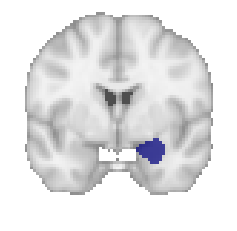

In [2]:
f = "../data/amygdala_roi.nii.gz"
fig, ax = plt.subplots(figsize=(6, 6))
plotting.plot_roi(
    f,
    draw_cross=False,
    annotate=False,
    display_mode="y",
    cut_coords=[0],
    axes=ax,
)
fig.set_size_inches((4, 4))
fig.savefig(
    "../content/images/figure_00_roi.png",
    transparent=True, 
    bbox_inches="tight", 
    pad_inches=0,
)

/opt/miniconda3/lib/python3.8/site-packages/nilearn/_utils/niimg.py:61: UserWarning: Non-finite values detected. These values will be replaced with zeros.
  warn(


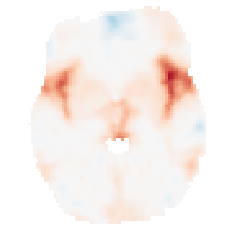

In [3]:
f = "../data/map_to_decode.nii.gz"
fig, ax = plt.subplots(figsize=(6, 6))
plotting.plot_stat_map(
    f,
    bg_img=None,
    draw_cross=False,
    annotate=False,
    cmap="RdBu_r",
    display_mode="z",
    cut_coords=[-4],
    axes=ax,
    colorbar=False,
)
fig.set_size_inches((4, 4))
fig.savefig(
    "../content/images/figure_00_map.png",
    transparent=True, 
    bbox_inches="tight", 
    pad_inches=0,
)

In [4]:
dset = nimare.dataset.Dataset.load("../data/neurosynth_dataset_first500.pkl.gz")
mask = nimare.utils.get_template("mni152_2mm", mask="brain")
dset.masker = nimare.utils.get_masker(mask)
studies = dset.get_studies_by_label("terms_abstract_tfidf__visual")
fear_dset = dset.slice(studies)
ale = nimare.meta.cbma.ALE(kernel__sample_size=20)
ale_res = ale.fit(fear_dset)

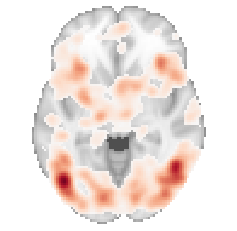

In [5]:
fig, ax = plt.subplots(figsize=(16, 6))
plotting.plot_stat_map(
    ale_res.get_map("z"),
    draw_cross=False,
    annotate=False,
    cmap="RdBu_r",
    display_mode="z",
    cut_coords=[-4],
    axes=ax,
    colorbar=False,
    threshold=.01,
)
fig.set_size_inches((4, 4))
fig.savefig(
    "../content/images/figure_00_cbma_unc.png",
    transparent=True,
    bbox_inches="tight",
    pad_inches=0,
)

In [6]:
corr = nimare.correct.FWECorrector(method="montecarlo", n_iters=100, n_cores=4)
ale_cres = corr.transform(ale_res)

INFO:nimare.correct:Using correction method implemented in Estimator: nimare.meta.cbma.ale.ALE.correct_fwe_montecarlo.


  0%|          | 0/100 [00:00<?, ?it/s]

INFO:nimare.meta.cbma.base:Using null distribution for voxel-level FWE correction.


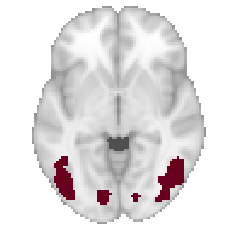

In [7]:
fig, ax = plt.subplots(figsize=(16, 6))
plotting.plot_stat_map(
    ale_cres.get_map("z_level-cluster_corr-FWE_method-montecarlo"),
    draw_cross=False,
    annotate=False,
    cmap="RdBu_r",
    display_mode="z",
    cut_coords=[-4],
    axes=ax,
    colorbar=False,
    threshold=0.01,
)
fig.set_size_inches((4, 4))
fig.savefig(
    "../content/images/figure_00_cbma_fwe.png",
    transparent=True,
    bbox_inches="tight",
    pad_inches=0,
)

In [8]:
macm = nimare.meta.cbma.ALE(kernel__sample_size=20)
studies = dset.get_studies_by_mask("../data/amygdala_roi.nii.gz")
amyg_dset = dset.slice(studies)
macm_res = macm.fit(amyg_dset)

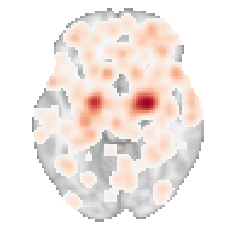

In [9]:
fig, ax = plt.subplots(figsize=(6, 6))
plotting.plot_stat_map(
    macm_res.get_map("z"),
    draw_cross=False,
    annotate=False,
    cmap="RdBu_r",
    display_mode="z",
    cut_coords=[-12],
    axes=ax,
    colorbar=False,
    threshold=.01,
)
fig.set_size_inches((4, 4))
fig.savefig(
    "../content/images/figure_00_macm_unc.png",
    transparent=True,
    bbox_inches="tight",
    pad_inches=0,
)

In [10]:
corr = nimare.correct.FWECorrector(method="montecarlo", n_iters=100, n_cores=4)
macm_cres = corr.transform(macm_res)

INFO:nimare.correct:Using correction method implemented in Estimator: nimare.meta.cbma.ale.ALE.correct_fwe_montecarlo.


  0%|          | 0/100 [00:00<?, ?it/s]

INFO:nimare.meta.cbma.base:Using null distribution for voxel-level FWE correction.


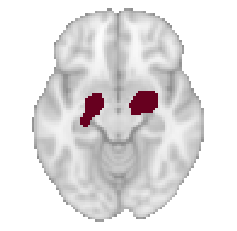

In [11]:
fig, ax = plt.subplots(figsize=(6, 6))
plotting.plot_stat_map(
    macm_cres.get_map("z_level-cluster_corr-FWE_method-montecarlo"),
    draw_cross=False,
    annotate=False,
    cmap="RdBu_r",
    display_mode="z",
    cut_coords=[-12],
    axes=ax,
    colorbar=False,
    threshold=0.01,
)
fig.set_size_inches((4, 4))
fig.savefig(
    "../content/images/figure_00_macm_fwe.png",
    transparent=True,
    bbox_inches="tight",
    pad_inches=0,
)

In [12]:
DATA_DIR = "../data/"
dset_dir = nimare.extract.download_nidm_pain(data_dir=DATA_DIR, overwrite=False)
dset_file = os.path.join(get_test_data_path(), "nidm_pain_dset.json")
img_dset = nimare.dataset.Dataset(dset_file)

# Point the Dataset toward the images we've downloaded
img_dset.update_path(dset_dir)

xformer = nimare.transforms.ImageTransformer(target=["z"])
img_dset = xformer.transform(img_dset)

INFO:nimare.extract.utils:Dataset found in ../data/nidm_21pain

INFO:nimare.utils:Shared path detected: '/Users/taylor/Documents/nbc/nimare-paper/data/nidm_21pain/'
INFO:nimare.utils:Shared path detected: '/Users/taylor/Documents/nbc/nimare-paper/data/nidm_21pain/'


In [13]:
ibma = nimare.meta.ibma.PermutedOLS()
ibma_res = ibma.fit(img_dset)

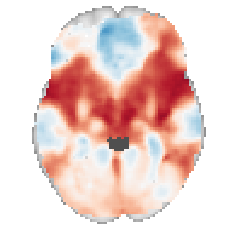

In [14]:
fig, ax = plt.subplots(figsize=(6, 6))
plotting.plot_stat_map(
    ibma_res.get_map("z"),
    draw_cross=False,
    annotate=False,
    cmap="RdBu_r",
    display_mode="z",
    cut_coords=[-4],
    axes=ax,
    colorbar=False,
    threshold=0.01,
)
fig.set_size_inches((4, 4))
fig.savefig(
    "../content/images/figure_00_ibma_unc.png",
    transparent=True,
    bbox_inches="tight",
    pad_inches=0,
)

In [15]:
corr = nimare.correct.FWECorrector(method="montecarlo", n_iters=1000, n_cores=4)
ibma_cres = corr.transform(ibma_res)

INFO:nimare.correct:Using correction method implemented in Estimator: nimare.meta.ibma.PermutedOLS.correct_fwe_montecarlo.


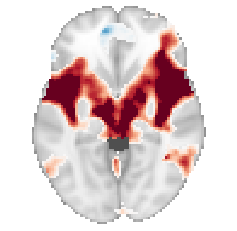

In [16]:
fig, ax = plt.subplots(figsize=(6, 6))
plotting.plot_stat_map(
    ibma_cres.get_map("z_level-voxel_corr-FWE_method-montecarlo"),
    draw_cross=False,
    annotate=False,
    cmap="RdBu_r",
    display_mode="z",
    cut_coords=[-4],
    axes=ax,
    colorbar=False,
    threshold=0.01,
)
fig.set_size_inches((4, 4))
fig.savefig(
    "../content/images/figure_00_ibma_fwe.png",
    transparent=True,
    bbox_inches="tight",
    pad_inches=0,
)